### Read in Data

In [10]:
import matplotlib
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import sklearn

close_features = pd.read_csv('train_features_close.csv')
close_labels = pd.read_csv('train_labels_close.csv')

open_features = pd.read_csv('train_features_open.csv')
open_labels = pd.read_csv('train_labels_open.csv')

### Hyperparameter tuning

In [11]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [12]:
dt = DecisionTreeRegressor()
parameters = {
    #'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'min_samples_leaf': [1]
    #'learning_rate': [0.01, 0.1, 1, 10, 100]
}
cv = GridSearchCV(dt, parameters, cv=5, scoring='r2')
cv.fit(close_features, close_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 7, 'min_samples_leaf': 1}

0.838 (+/-0.035) for {'max_depth': 1, 'min_samples_leaf': 1}
0.887 (+/-0.032) for {'max_depth': 3, 'min_samples_leaf': 1}
0.907 (+/-0.03) for {'max_depth': 5, 'min_samples_leaf': 1}
0.908 (+/-0.03) for {'max_depth': 7, 'min_samples_leaf': 1}
0.908 (+/-0.03) for {'max_depth': 9, 'min_samples_leaf': 1}


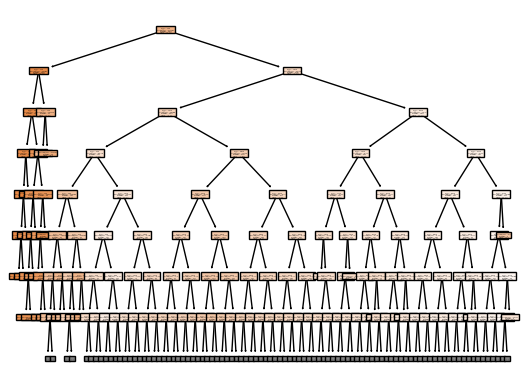

In [ ]:
dt = dt.fit(close_features, close_labels)
sklearn.tree.plot_tree(decision_tree=dt, max_depth=7, filled=True)
matplotlib.pyplot.savefig("plot_close.pdf", format="pdf")

In [14]:
cv.best_estimator_

DecisionTreeRegressor(max_depth=7)

### Write out pickled model

In [15]:
joblib.dump(cv.best_estimator_, 'models/DT_model_close.pkl')

['models/DT_model_close.pkl']

In [16]:
dt = DecisionTreeRegressor()
parameters = {
    #'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'min_samples_leaf': [1]
    #'learning_rate': [0.01, 0.1, 1, 10, 100]
}
cv = GridSearchCV(dt, parameters, cv=5, scoring='r2')
cv.fit(open_features, open_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 7, 'min_samples_leaf': 1}

0.077 (+/-0.283) for {'max_depth': 1, 'min_samples_leaf': 1}
0.249 (+/-0.224) for {'max_depth': 3, 'min_samples_leaf': 1}
0.281 (+/-0.227) for {'max_depth': 5, 'min_samples_leaf': 1}
0.284 (+/-0.229) for {'max_depth': 7, 'min_samples_leaf': 1}
0.283 (+/-0.229) for {'max_depth': 9, 'min_samples_leaf': 1}


In [17]:
cv.best_estimator_

DecisionTreeRegressor(max_depth=7)

In [18]:
joblib.dump(cv.best_estimator_, 'models/DT_model_open.pkl')

['models/DT_model_open.pkl']